# **Variance Treshold**

In [1]:
import pandas as pd
data = pd.DataFrame({
    'age':[25,30,35,40,45],
    'salary':[5000,6000,7000,8000,9000],
    'country_code':[1,1,1,1,1]
})
data

,age,salary,country_code
0,25,5000,1
1,30,6000,1
2,35,7000,1
3,40,8000,1
4,45,9000,1


In [4]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
selected_data = selector.fit_transform(data)

selected_data = data.columns[selector.get_support()]
selected_data

Index(['age', 'salary'], dtype='object')

In [7]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold


data = pd.DataFrame({
    'Age': [25, 40, 35, 50],
    'Blood_Pressure': [120, 140, 130, 150],
    'Cholesterol': [200, 240, 220, 260],
    'Gender': [0, 1, 0, 1],
    'Country_Code': ['India', 'India', 'India', 'India'],
    'Hospital_ID': [101, 101, 101, 101],
    'Machine_Version': ['v2.1', 'v2.1', 'v2.1', 'v2.1']
})


data['Country_Code'] = 1
data['Machine_Version'] = 1


selector = VarianceThreshold(threshold=0.01)
reduced_data = selector.fit_transform(data)

print("Remaining Features:", data.columns[selector.get_support()])


Remaining Features: Index(['Age', 'Blood_Pressure', 'Cholesterol', 'Gender'], dtype='object')


## **Correlation Coefficient:**

In [17]:
import numpy as np
dat = pd.DataFrame({
    'size_sqft':[1000,1500,2000,2500,3000],
    'tiles_count':[100,150,200,250,300],
    'price':[200000,300000,400000,500000,600000]
})
dat

,size_sqft,tiles_count,price
0,1000,100,200000
1,1500,150,300000
2,2000,200,400000
3,2500,250,500000
4,3000,300,600000


In [18]:
correlation_matrix = dat.corr()
correlation_matrix

,size_sqft,tiles_count,price
size_sqft,1.0,1.0,1.0
tiles_count,1.0,1.0,1.0
price,1.0,1.0,1.0


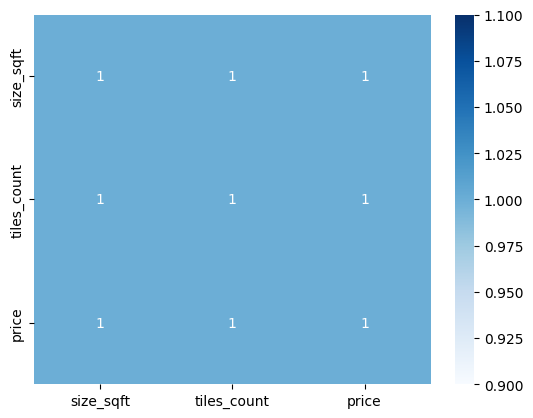

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix,annot=True,cmap='Blues')
plt.show()


In [20]:
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column]>0.9)]
print("Hightly Correlated Featured to Drop: ",to_drop)

Hightly Correlated Featured to Drop:  ['tiles_count', 'price']


In [21]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 200
house_size = np.random.normal(loc=1500, scale=300, size=n)
number_of_tiles = house_size * 1.8 + np.random.normal(0, 50, n)
construction_cost = house_size * 1200 + np.random.normal(0, 20000, n)
bedrooms = (house_size / 500).astype(int)
market_price = (
    house_size * 3000 +
    bedrooms * 50000 +
    np.random.normal(0, 100000, n)
)
data = pd.DataFrame({
    "House_Size_sqft": house_size,
    "Number_of_Tiles": number_of_tiles,
    "Construction_Cost": construction_cost,
    "Number_of_Bedrooms": bedrooms,
    "Market_Price": market_price
})

print(data.head())


   House_Size_sqft  Number_of_Tiles  Construction_Cost  Number_of_Bedrooms  \
0      1649.014246      2986.115011       1.946929e+06                   3   
1      1458.520710      2653.376504       1.738237e+06                   2   
2      1694.306561      3103.904373       2.033273e+06                   3   
3      1956.908957      3575.126225       2.349230e+06                   3   
4      1429.753988      2504.673709       1.706703e+06                   2   

   Market_Price  
0  5.172742e+06  
1  4.383346e+06  
2  5.319880e+06  
3  6.156291e+06  
4  4.430605e+06  


In [22]:
print(data.corr())


                    House_Size_sqft  Number_of_Tiles  Construction_Cost  \
House_Size_sqft            1.000000         0.995346           0.998249   
Number_of_Tiles            0.995346         1.000000           0.993489   
Construction_Cost          0.998249         0.993489           1.000000   
Number_of_Bedrooms         0.885518         0.878890           0.885231   
Market_Price               0.993256         0.987335           0.992357   

                    Number_of_Bedrooms  Market_Price  
House_Size_sqft               0.885518      0.993256  
Number_of_Tiles               0.878890      0.987335  
Construction_Cost             0.885231      0.992357  
Number_of_Bedrooms            1.000000      0.883700  
Market_Price                  0.883700      1.000000  


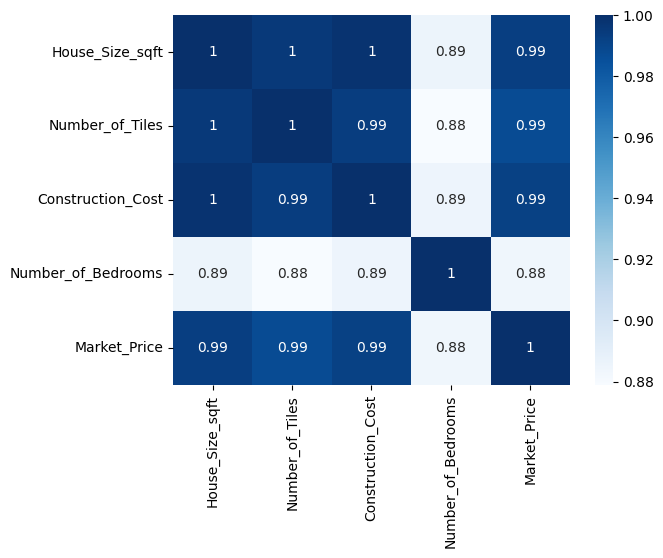

In [23]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

In [24]:
import pandas as pd
import numpy as np


corr_matrix = data.corr()


threshold = 0.9


to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

print("Features to remove:", to_drop)


data_reduced = data.drop(columns=to_drop)


Features to remove: {'Number_of_Tiles', 'Market_Price', 'Construction_Cost'}


In [25]:
data

,House_Size_sqft,Number_of_Tiles,Construction_Cost,Number_of_Bedrooms,Market_Price
0,1649.014246,2986.115011,1.946929e+06,3,5.172742e+06
1,1458.520710,2653.376504,1.738237e+06,2,4.383346e+06
2,1694.306561,3103.904373,2.033273e+06,3,5.319880e+06
3,1956.908957,3575.126225,2.349230e+06,3,6.156291e+06
4,1429.753988,2504.673709,1.706703e+06,2,4.430605e+06
...,...,...,...,...,...
195,1615.595214,2884.612602,1.928514e+06,3,5.102101e+06
196,1234.842769,2137.060258,1.476414e+06,2,3.800573e+06
197,1546.117532,2850.705176,1.835766e+06,3,4.856503e+06
198,1517.462616,2725.705716,1.812069e+06,3,4.705220e+06


# **Chi-Square Test**

In [26]:
X = pd.DataFrame({
    'gender':[0,1,0,1,1],
    'married':[1,1,0,0,1],
    'income':[10000,20000,30000,40000,50000]
})
y= [0,1,1,0,1]
X

,gender,married,income
0,0,1,10000
1,1,1,20000
2,0,0,30000
3,1,0,40000
4,1,1,50000


In [27]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
selector = SelectKBest(score_func=chi2,k=2)
X_new= selector.fit_transform(X_scaled,y)
selected_features = X.columns[selector.get_support()]
print("Slected Features: ",selected_features)

Slected Features:  Index(['married', 'income'], dtype='object')


In [31]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder


np.random.seed(42)
n = 200

data = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female'], n),
    'Marital_Status': np.random.choice(['Yes', 'No'], n),
    'Education': np.random.choice(['Graduate', 'Non-Graduate'], n),
    'Property_Area': np.random.choice(['Urban', 'Rural'], n),
    'Favorite_Color': np.random.choice(['Blue', 'Red', 'Green'], n)
})


data['Loan_Status'] = np.where(
    (data['Education'] == 'Graduate') & (data['Property_Area'] == 'Urban'),
    'Approved',
    'Rejected'
)

print("Sample Data:\n", data.head())


le = LabelEncoder()

encoded_data = data.copy()

for col in encoded_data.columns:
    encoded_data[col] = le.fit_transform(encoded_data[col])


X = encoded_data.drop('Loan_Status', axis=1)
y = encoded_data['Loan_Status']



chi_scores, p_values = chi2(X, y)

chi_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Score': chi_scores,
    'P_Value': p_values
})

print("\nChi-Square Results:\n", chi_df)

significant_features = chi_df[chi_df['P_Value'] < 0.05]['Feature']

print("\nSignificant Features:", list(significant_features))


X_reduced = X[significant_features]

print("\nFinal Dataset After Removing Insignificant Features:")
print(X_reduced.head())


Sample Data:
    Gender Marital_Status     Education Property_Area Favorite_Color  \
0    Male            Yes  Non-Graduate         Urban           Blue   
1  Female             No  Non-Graduate         Rural            Red   
2    Male            Yes      Graduate         Rural           Blue   
3    Male            Yes      Graduate         Rural           Blue   
4    Male             No  Non-Graduate         Urban            Red   

  Loan_Status  
0    Rejected  
1    Rejected  
2    Rejected  
3    Rejected  
4    Rejected  

Chi-Square Results:
           Feature  Chi2_Score       P_Value
0          Gender    1.411632  2.347857e-01
1  Marital_Status    0.178687  6.725041e-01
2       Education   33.155844  8.506034e-09
3   Property_Area   31.711105  1.788963e-08
4  Favorite_Color    0.159412  6.896988e-01

Significant Features: ['Education', 'Property_Area']

Final Dataset After Removing Insignificant Features:
   Education  Property_Area
0          1              1
1          1 